# Project NOAH api: Flood maps

* [API](http://noah.up.edu.ph/apidocs/)

Data
* api/doppler
* api/floodMaps
* api/floodReports
* api/fourHourForecast
* api/landslideMaps
* api/latestContour
* api/satellite
* api/sevenDayForecast
* api/stormSurgeMaps
* api/stationByTypeID
* api/stations

In [1]:
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20
rcParams['ytick.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 'large'

In [2]:
noah_data = ['flood_maps', 'flood_reports']

In [3]:
import pandas as pd
from tqdm import tqdm

base_url = 'http://noah.up.edu.ph/api/'


json_data = {}

for i in tqdm(noah_data):
    print(i)
    if i=='flood_reports':
        annual_data = {}
        for year in range(2000,2019):
            annual_data[year] = pd.read_json(base_url+'reports/flood/'+str(year))
        json_data[i] = annual_data
    else:
        json_data[i]=pd.read_json(base_url+i)

  0%|          | 0/2 [00:00<?, ?it/s]

flood_maps


 50%|█████     | 1/2 [00:00<00:00,  1.59it/s]

flood_reports


100%|██████████| 2/2 [00:09<00:00,  3.05s/it]


## Flood Maps

In [4]:
flood_map = json_data['flood_maps'].set_index('verbose_name')
flood_map

,layers,type_id
verbose_name,,
5-Year,"[{'srid': 4326, 'mun_city_psgc': '083701000', ...",1
10-Year,"[{'srid': 4326, 'mun_city_psgc': '103504000', ...",2
25-Year,"[{'srid': 4326, 'mun_city_psgc': '083701000', ...",3
50-Year,"[{'srid': 4326, 'mun_city_psgc': '103504000', ...",4
100-Year,"[{'srid': 4326, 'mun_city_psgc': '013301000', ...",5
Ondoy,[],6


In [5]:
import folium
import os

ph_coord=[13, 122]

m = folium.Map(location=ph_coord, 
                     #tiles='Stamen Toner',
                     #tiles='cartodbpositron'
                     zoom_start=6)
save_map = False

if save_map:
    if not os.path.exists('results'):
        os.makedirs('results')
    m.save(os.path.join('results', 'out0.html'))

In [6]:
m

### 5-year

In [7]:
df = flood_map['layers']['5-Year']

In [8]:
df[0]

{'center': {'lat': 10.6584459547, 'lng': 125.044820722},
 'geoserver_layer': 'flood_5:Leyte_Abuyog_Flood_5year',
 'mun_city_psgc': '083701000',
 'srid': 4326}

In [9]:
#regerate map
m = folium.Map(location=ph_coord, 
                     #tiles='Stamen Toner',
                     #tiles='cartodbpositron'
                     zoom_start=6)

print('There are {} flood incidents!'.format(len(df)))

provinces = []
try:
    for i in range(len(df)):
        d = df[i]
        loc = d['center']
        lat,lon = loc['lat'],loc['lng']

        provinces.append(d['geoserver_layer'].split(':')[1].split('_')[0])
        name = d['geoserver_layer'].split(':')[1].split('_')[1]
        psgc = d['mun_city_psgc']
        
        #add annotation to map
        folium.Marker([lat, lon], popup=name).add_to(m)
except Exception as e:
    #print(e)
    pass

m

There are 381 flood incidents!


Either there are no flooding incident in Palawan or data is missing.

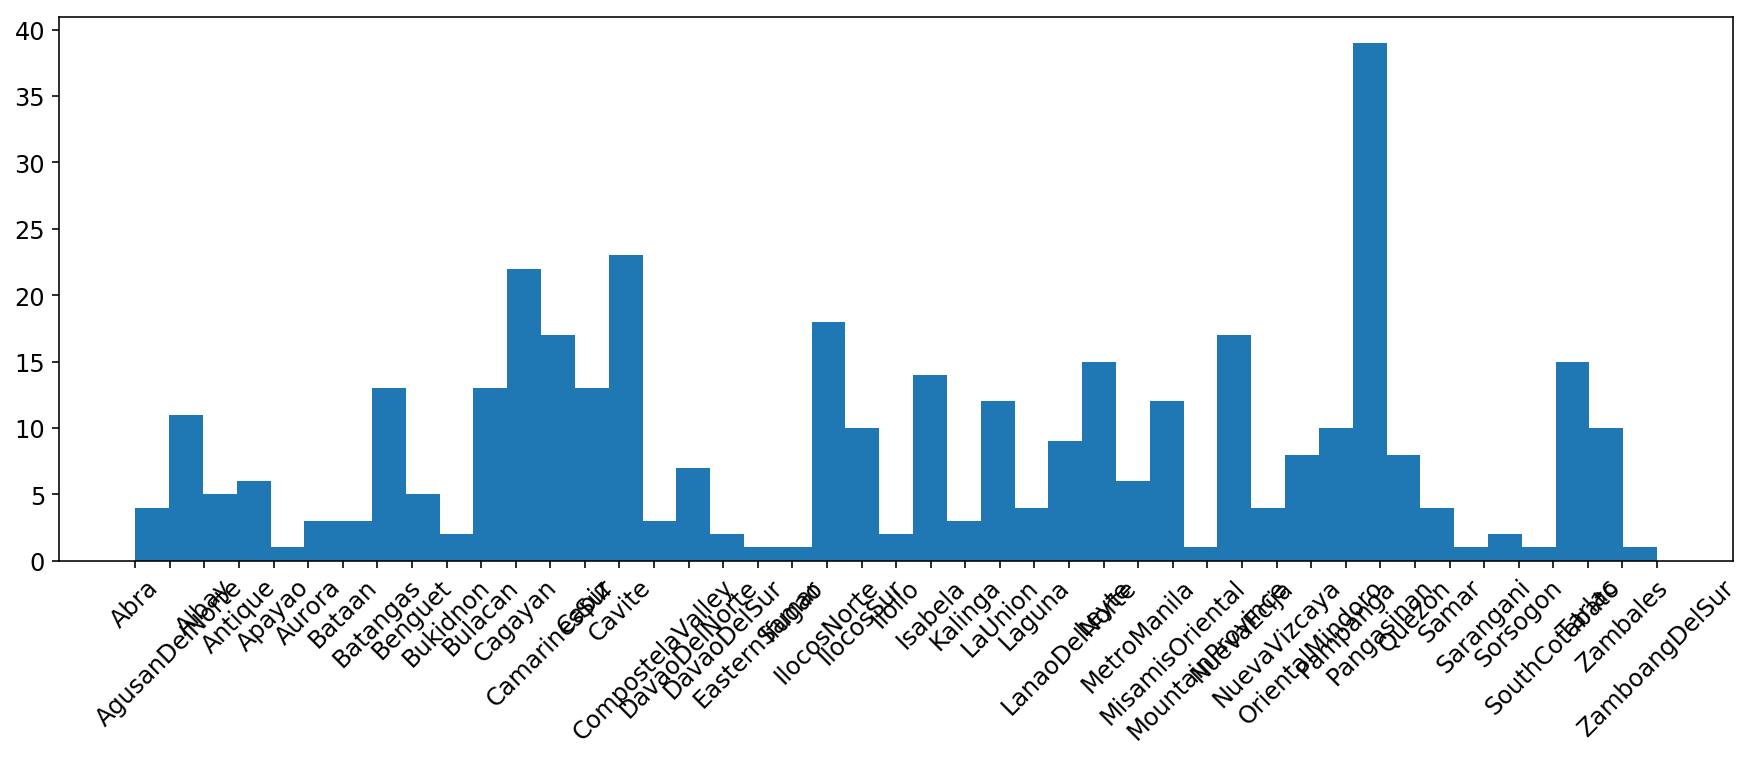

In [10]:
import matplotlib.pyplot as pl
%matplotlib inline

fig = pl.figure(figsize=(15,5))
n, bins, _ = pl.hist(provinces,bins=len(set(provinces)),align='mid');
pl.xticks(rotation=45);
#fig.tight_layout()

It seems flood incidence in Oriental Mindoro is highest. (How to set zoom into location `m`?)

## Flood Reports

In [14]:
#data retrieved from 2000 - 2018
df = json_data['flood_reports'][2009]
df.head()

,details,flood_height,flood_time,image_url,lat,lng
0,Ondoy flood in Quezon City. Bakit?,1.5-Storeys High,2009-02-26 11:00:00,NaN,14.641070,121.034990
1,no flood in front of our house,No Flood,2009-02-26 11:00:00,NaN,14.640394,121.055708
2,,2-Storeys or Higher,2009-02-26 12:00:00,NaN,14.637729,121.142470
3,,Knee High,2009-02-26 14:00:00,NaN,14.644633,121.059212
4,,Knee High,2009-02-26 14:30:00,NaN,14.651468,121.046546


See also mapping using [folium](https://github.com/jpdeleon/opendataph/blob/master/map/chloroplet%20map%20with%20folium.ipynb)

## Yearly flood report

In [12]:
print('Year\tNo. of flood incidents\n')
for year in range(2001,2019):
    d = json_data['flood_reports'][year]
    print('{}:\t{}'.format(year,len(d)))

Year	No. of flood incidents

2001:	2
2002:	0
2003:	1
2004:	1
2005:	0
2006:	2
2007:	0
2008:	1
2009:	1038
2010:	97
2011:	197
2012:	2565
2013:	439
2014:	1701
2015:	69
2016:	159
2017:	1
2018:	0


2012 seems a pretty rough year

### Flood distribution per year

In [13]:
year = 2013

#regerate map
m = folium.Map(location=ph_coord, 
                     #tiles='Stamen Toner',
                     #tiles='cartodbpositron'
                     zoom_start=6)

d = json_data['flood_reports'][year]
print('There are {} flood incidents!'.format(len(d)))

try:
    for n in tqdm(range(len(d))):
        lat,lon = float(d['lat'][n]), float(d['lng'][n])
        
        #add annotation to map
        folium.Marker([lat, lon], popup=str(n)).add_to(m)
except Exception as e:
    #print(e)
    pass

m

  0%|          | 0/439 [00:00<?, ?it/s]

There are 439 flood incidents!


100%|██████████| 439/439 [00:16<00:00, 32.92it/s]


All years (Make take > 5 mins!)